**The flow of the Notebook:**

1. Description of the Problem Statement.

2. International Airline Passengers prediction Dataset Loading.

3. Check The Dataset.

4. Visualize The Dataset

5. Split data into train and test

6. Apply TimeseriesGenerator to organize data into the right format

7. Build a Simple Feed Forward Neural Network.

8. Train The Model.

9. Make Prediction

10. Calculate RMSE

11. Forecasting and Visualization

**Problem Statement:**

International Airline Passengers prediction problem. This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

**Load The Dataset**

In [2]:
# Load the dataset
data = read_csv('data/AirPassengers.csv', usecols=[1])

**Visualize The Dataset**

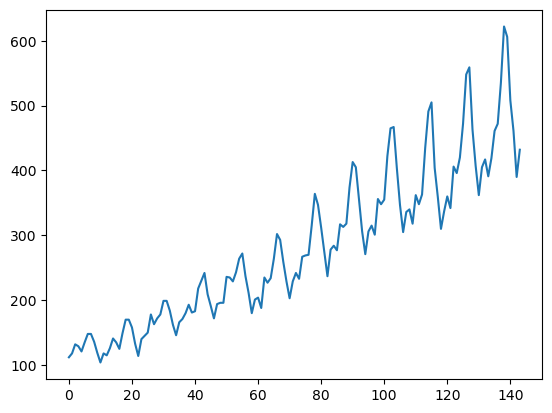

In [3]:
plt.plot(data)

In [5]:
# Convert pandas dataframe to numpy array
dataset = data.values
dataset = data.astype('float32')  # Convert values to float

In [6]:
# Normalization is optional but recommended for neural network as certain
# activation functions are sensitive to magnitude of numbers.
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))  # Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

**Split data into train and test**

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

**Define Sequence and Batch Size**

In [8]:
# seq_size is the number of time steps to look back
seq_size = 20  # Number of time steps to look back

batch_size = 1

**Apply TimeseriesGenerator to organize data into the right format**

In [25]:
train_generator = TimeseriesGenerator(train.reshape(-1), train.reshape(-1), length=seq_size, batch_size=batch_size)
print("Total number of samples in the original training data = ", len(train)) # 95
print("Total number of samples in the generated data = ", len(train_generator)) # 55
#Also generate validation data
validation_generator = TimeseriesGenerator(test.reshape(-1), test.reshape(-1), length=seq_size, batch_size=batch_size)

Total number of samples in the original training data =  95
Total number of samples in the generated data =  75


In [9]:
# Use TimeseriesGenerator to organize training data into the right format
train_generator = TimeseriesGenerator(train, train, length=seq_size, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test, test, length=seq_size, batch_size=batch_size)

**Build a Feed Forward Neural Network**

In [26]:
# Build the model using Functional API
input_layer = Input(shape=(seq_size,))
dense_1 = Dense(units=64, activation='relu')(input_layer)
dense_2 = Dense(units=32,activation='relu')(dense_1)
output_layer = Dense(1)(dense_2)

In [27]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])

In [28]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                1344      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________
None


**Train The Model**

In [29]:
model.fit_generator(generator=train_generator, verbose=2, epochs=100, validation_data=validation_generator)

Epoch 1/100


C:\Users\sazid\AppData\Local\Temp\ipykernel_13824\416170021.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator, verbose=2, epochs=100, validation_data=validation_generator)


75/75 - 2s - loss: 0.0089 - acc: 0.0000e+00 - val_loss: 0.0079 - val_acc: 0.0345 - 2s/epoch - 23ms/step
Epoch 2/100
75/75 - 0s - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0345 - 332ms/epoch - 4ms/step
Epoch 3/100
75/75 - 0s - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0345 - 338ms/epoch - 5ms/step
Epoch 4/100
75/75 - 0s - loss: 0.0010 - acc: 0.0000e+00 - val_loss: 0.0055 - val_acc: 0.0345 - 325ms/epoch - 4ms/step
Epoch 5/100
75/75 - 0s - loss: 7.2751e-04 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0345 - 310ms/epoch - 4ms/step
Epoch 6/100
75/75 - 0s - loss: 6.7175e-04 - acc: 0.0000e+00 - val_loss: 0.0028 - val_acc: 0.0345 - 320ms/epoch - 4ms/step
Epoch 7/100
75/75 - 0s - loss: 5.5415e-04 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0345 - 329ms/epoch - 4ms/step
Epoch 8/100
75/75 - 0s - loss: 6.5284e-04 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0345 - 326ms/epoch - 4ms/step
Epoch 9/100
75/75 - 0s - loss: 7.3072e-04 - acc: 0.000

Epoch 68/100
75/75 - 0s - loss: 3.1855e-04 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0345 - 287ms/epoch - 4ms/step
Epoch 69/100
75/75 - 0s - loss: 2.2471e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0345 - 293ms/epoch - 4ms/step
Epoch 70/100
75/75 - 0s - loss: 2.5341e-04 - acc: 0.0000e+00 - val_loss: 0.0043 - val_acc: 0.0345 - 294ms/epoch - 4ms/step
Epoch 71/100
75/75 - 0s - loss: 3.9695e-04 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0345 - 293ms/epoch - 4ms/step
Epoch 72/100
75/75 - 0s - loss: 2.2499e-04 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0345 - 286ms/epoch - 4ms/step
Epoch 73/100
75/75 - 0s - loss: 2.7265e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0345 - 296ms/epoch - 4ms/step
Epoch 74/100
75/75 - 0s - loss: 2.8321e-04 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0345 - 294ms/epoch - 4ms/step
Epoch 75/100
75/75 - 0s - loss: 2.5103e-04 - acc: 0.0000e+00 - val_loss: 9.9388e-04 - val_acc: 0.0345 - 282ms/epoch - 4ms/step
Epoch 76/100

**Make Prediction**

In [30]:
# make predictions
trainPredict = model.predict(train_generator)
testPredict = model.predict(validation_generator)

29/29 [==============================] - 0s 2ms/step


In [31]:
# Estimate model performance
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform(train[seq_size:])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform(test[seq_size:])

**Calculate RMSE**

In [32]:
# Calculate root mean squared error
trainScore = mean_squared_error(trainY_inverse, trainPredict[:, 0])
print('Train Score: %.2f RMSE' % (trainScore))

testScore = mean_squared_error(testY_inverse, testPredict[:, 0])
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 44.71 RMSE
Test Score: 485.28 RMSE


**Forecasting and Visualization**

In [33]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict) + seq_size, :] = trainPredict

In [35]:
# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train) + (seq_size) - 1:len(dataset) - 1, :] = testPredict

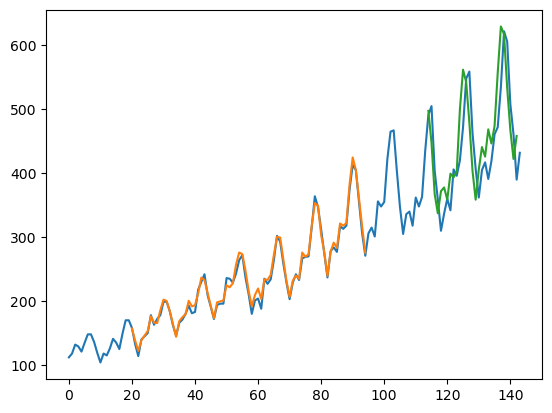

In [36]:
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()